<a href="https://colab.research.google.com/github/geokoun/geokoun.github.io/blob/main/Boostraping_Steltjes_l_%3D_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

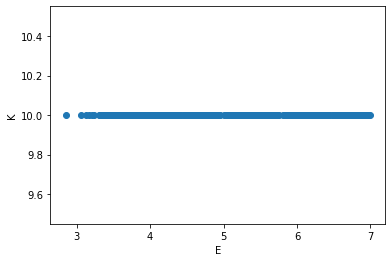

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import math


rng = np.random.default_rng(12345)


Ec=[]
Kc=[]
K = 10


for k in range(0,10000):

  E = rng.random()*7

  X = np.zeros(shape=(2*K+1))
  
#Moment recursion  
  for i in range(0,2*K+1):
    if (i==0):
      X[i]= 1
    if (i==1):
      X[i]= 2*E/3  # -3/(4*E) for Hydrogen
    if (i==2):
      X[i]=4*E*X[1]/5   #(-4*(2*i+1)X[i-1] -(i-1)*i*(i+1)*X[i-2])/(8*(i+1)*E) for Hydrogen
    if (i > 2):
      X[i]= (2*i*E*X[i-1]+(i)*(i-1)*(i-2)*X[i-3]/2)/3

#Hamburger and Steltjes Matrices
  M=np.zeros(shape=(K,K))
  MS=np.zeros(shape=(K-1,K-1))

  for j in range(0,K):
    for l in range(0,K):
      M[j][l]=X[j+l]
  
  for m in range(0,K-1):
    for n in range(0,K-1):
      MS[m][n]=X[m+n+1]


#Positivity check
  p= min(linalg.eigvals(M))
  ps= min(linalg.eigvals(MS))

  if(ps >= 0 and p >= 0):
    Ec.append(E)
    Kc.append(K)

   
plt.scatter(Ec,Kc,label="K= 9 bootstraping for l=0")
plt.xlabel("E")
plt.ylabel("K")
plt.show()